In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors

import sklearn.datasets as ds
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
## 设置属性防止中文乱码及拦截异常信息
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
def drawData(X, Y, name):
    plt.figure(figsize=(4, 3), facecolor='w')
    unique_lables = set(Y)
    colors = plt.cm.Spectral(np.linspace(0,1,len(unique_lables)))
    for k,col in zip(unique_lables,colors):
        x_k = X[Y==k]
        plt.plot(x_k[:,0], x_k[:,1], 'o', markerfacecolor=col,markeredgecolor="k",
                 markersize=14)
    plt.title(name)
    plt.show()

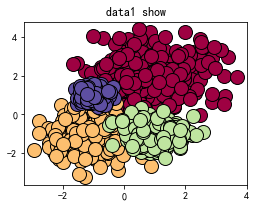

In [5]:
### 创建模拟数据
N = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
data1, y1 = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=(1,0.75, 0.5,0.25), random_state=0)
drawData(data1, y1, name='data1 show')

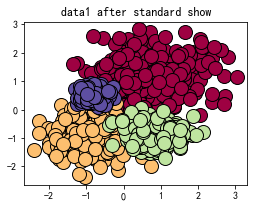

In [6]:
data1 = StandardScaler().fit_transform(data1)  # 将数据标准化
drawData(data1, y1, name='data1 after standard show')
# DBSCAN中需要调的两个参数
# 参数1：领域值
# 参数2：m阈值
params1 = ((0.15, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15))  

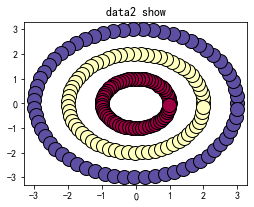

In [7]:
t = np.arange(0, 2 * np.pi, 0.1)
data2_1 = np.vstack((np.cos(t), np.sin(t))).T
data2_2 = np.vstack((2*np.cos(t), 2*np.sin(t))).T
data2_3 = np.vstack((3*np.cos(t), 3*np.sin(t))).T
data2 = np.vstack((data2_1, data2_2, data2_3))
y2 = np.vstack(([0] * len(data2_1), [1] * len(data2_2), [2] * len(data2_3)))
params2 = ((0.5, 3), (0.5, 5), (0.5, 10), (1., 3), (1., 10), (1., 20))

drawData(data2, y2.flatten(), 'data2 show')

In [8]:
datasets = [(data1, y1, params1), (data2, y2, params2)]
print('datasets 1:')
print('\tdata shape:', data1.shape, '\n\tdata 0-5:', data1[:5, :])

print('datasets 2:')
print('\tdata shape:', data2.shape, '\n\tdata 0-5:', data2[:5, :])

datasets 1:
	data shape: (1000, 2) 
	data 0-5: [[-0.02360889  0.23030167]
 [ 2.28413921  1.46226668]
 [-0.90597331  0.7204428 ]
 [ 0.49835033 -1.65682002]
 [-0.95419381  0.236794  ]]
datasets 2:
	data shape: (189, 2) 
	data 0-5: [[1.         0.        ]
 [0.99500417 0.09983342]
 [0.98006658 0.19866933]
 [0.95533649 0.29552021]
 [0.92106099 0.38941834]]


In [9]:
def expandBorder(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

类别: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] ；聚类簇数目: 16
类别: [-1  0  1  2  3  4] ；聚类簇数目: 5
类别: [-1  0  1  2  3  4] ；聚类簇数目: 5
类别: [-1  0  1  2] ；聚类簇数目: 3
类别: [-1  0] ；聚类簇数目: 1
类别: [-1  0] ；聚类簇数目: 1


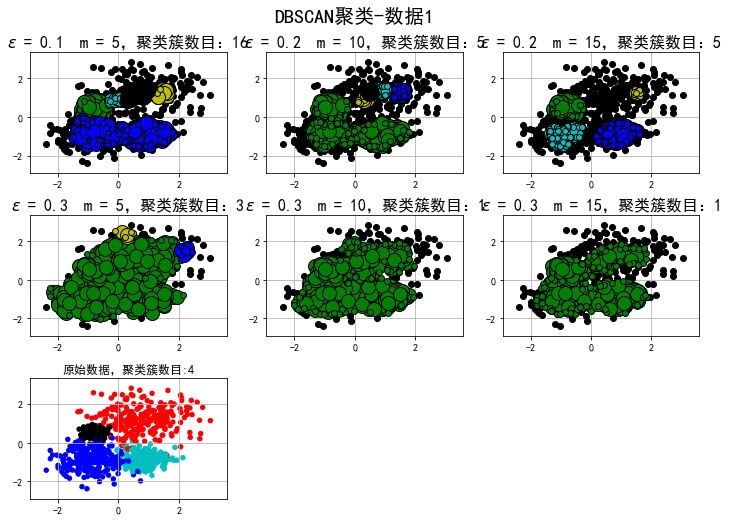

类别: [0 1 2] ；聚类簇数目: 3
类别: [-1  0  1] ；聚类簇数目: 2
类别: [-1  0] ；聚类簇数目: 1
类别: [0] ；聚类簇数目: 1
类别: [-1  0] ；聚类簇数目: 1
类别: [-1  0] ；聚类簇数目: 1


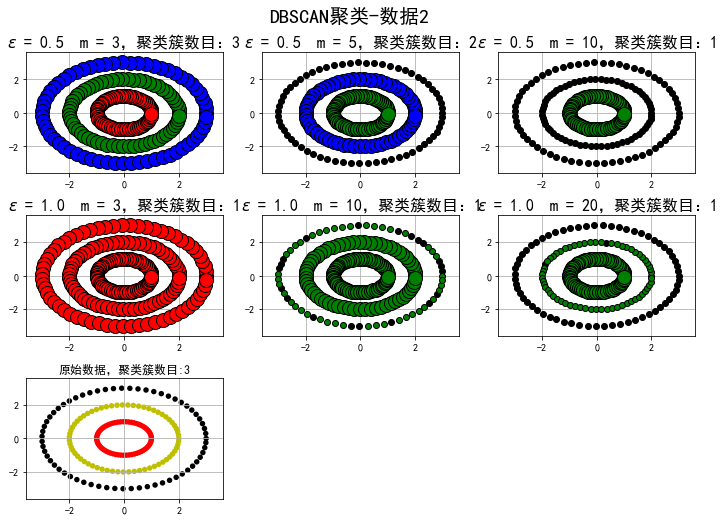

In [10]:
colors = ['r', 'g', 'b', 'y', 'c', 'k']
cm = mpl.colors.ListedColormap(colors)

for i,(X, y, params) in enumerate(datasets):
    x1_min, x2_min = np.min(X, axis=0)
    x1_max, x2_max = np.max(X, axis=0)
    x1_min, x1_max = expandBorder(x1_min, x1_max)
    x2_min, x2_max = expandBorder(x2_min, x2_max)
    
    plt.figure(figsize=(12, 8), facecolor='w')
    plt.suptitle(u'DBSCAN聚类-数据%d' % (i+1), fontsize=20)
    plt.subplots_adjust(top=0.9,hspace=0.35)
    
    for j,param in enumerate(params):
        eps, min_samples = param
        model = DBSCAN(eps=eps, min_samples=min_samples)
        #eps 半径，控制邻域的大小，值越大，越能容忍噪声点，值越小，相比形成的簇就越多
        #min_samples 原理中所说的M，控制哪个是核心点，值越小，越可以容忍噪声点，越大，就更容易把有效点划分成噪声点
        
        model.fit(X)
        y_hat = model.labels_

        unique_y_hat = np.unique(y_hat)
        n_clusters = len(unique_y_hat) - (1 if -1 in y_hat else 0)
        print ("类别:",unique_y_hat,"；聚类簇数目:",n_clusters)
        
        
        core_samples_mask = np.zeros_like(y_hat, dtype=bool)
        core_samples_mask[model.core_sample_indices_] = True
        
        ## 开始画图
        plt.subplot(3,3,j+1)
        for k, col in zip(unique_y_hat, colors):
            if k == -1:
                col = 'k'
                
            class_member_mask = (y_hat == k)
            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.grid(True)
        plt.title('$\epsilon$ = %.1f  m = %d，聚类簇数目：%d' % (eps, min_samples, n_clusters), fontsize=16)
        
    ## 原始数据显示
    plt.subplot(3,3,7)
    plt.scatter(X[:, 0], X[:, 1], c=y if y.ndim <= 1 else y.flatten(), s=30, cmap=cm, edgecolors='none')
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.title('原始数据，聚类簇数目:%d' % len(np.unique(y)))
    plt.grid(True)
    plt.show()   
